# Деревья решений

## Построение дерева

Опишем жадный алгоритм построения бинарного дерева решений:
1. Начинаем со всей обучающей выборки $X$, которую помещаем в корень $R_1$.
2. Задаём функционал качества $Q(X, j, t)$ и критерий остановки.
3. Запускаем построение из корня: $SplitNode(1, R_1)$

Функция $SplitNode(m, R_m)$
1. Если выполнен критерий остановки, то выход.
2. Находим наилучший с точки зрения $Q$ предикат: $j, t$: $[x_j<t]$
3. Помещаем предикат в вкршину и получаем с его помощью разбиение $X$ на две части: $R_{left} = \lbrace x|x_j<t \rbrace$ и $R_{right} = \lbrace x|x_j \geqslant t \rbrace$
4. Поместим $R_{left}$ и $R_{right}$ соответсвенно в левое и правое поддерево.
5. Рекурсивно повторяем $SplitNode(left, R_{left})$ и $SplitNode(right, R_{right})$.

В конце поставим в соответствие каждому листу ответ. Для задачи классификации - это самый частый среди объектов класс или вектор с долями классов (можно интерпретировать как вероятности):
$$ c_v = \arg \max_{k\in Y} \sum_{(x_i,y_i) \in R_v} [y_i=k]  $$

## Функционал качества для деревьев решений


Энтропия Шеннона для системы с N возможными состояниями определяется по формуле:
$$H = - \sum_{i=0}^{N} p_i\log_2p_i $$

где $p_i$ – вероятности нахождения системы в $i$-ом состоянии.

Это очень важное понятие теории информации, которое позволяет оценить количество информации (степень хаоса в системе). Чем выше энтропия, тем менее упорядочена система и наоборот. С помощью энтропии мы формализуем функционал качества для разделение выборки (для задачи классификации).

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt

import random
from pprint import pprint

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

Код для расчёта энтропии:

In [ ]:
def entropy(y):

    _, counts = np.unique(y, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

Здесь $y$ - это массив значений целевой переменной

Энтропия – по сути степень хаоса (или неопределенности) в системе. Уменьшение энтропии называют приростом информации (information gain, IG).

Обочначим $R_v$ - объекты, которые нужно разделить в помощью предиката в вершине $v$. Запишем формулу для расчёта информационного прироста:
$$ Q = IG = H(R_v) - (H(R_{left})+H(R_{right}))$$

На каждом шаге нам нужно максимизировать этот функционал качества. Как это делать? Например, так можно перебрать $t$ для выбранного $j$.

Предыдущая версия формулы прироста информации слишком упрощена. В работе необходимо использовать более устойчивую формулу, которая учитывает не только энтропию подмножеств, но и их размер.

$$ Q = IG = H(R_v) - \Big (\frac{|R_{left}|} {|R_{v}|} H(R_{left})+ \frac{|R_{right}|} {|R_{v}|} H(R_{right})\Big)$$

где, $|R_{v}|$, $|R_{left}|$ и $|R_{right}|$ - количество элементов в соответствующих множествах.


### Задание 4.1

Реализуйте алгоритм построения дерева. Должны быть отдельные функции (методы) для расчёта энтропии (уже есть), для разделения дерева (используйте `pandas`), для подсчёта функционала качества $IG$, для выбора наилучшего разделения (с учетом признакоd и порогов), для проверки критерия остановки.

Для набора данных `iris` реализуйте алгоритм и минимум три из разными критерия остановки из перечисленных ниже:
* максимальной глубины дерева = 5
* минимального числа объектов в листе = 5
* максимальное количество листьев в дереве = 5
* purity (остановка, если все объекты в листе относятся к одному классу)

Реализуйте функцию `predict` (на вход функции подаётся датафрейм с объектами)

Оцените точность каждой модели с помощью метрики точность (`from sklearn.metrics import accuracy_score` или реализовать свою).

In [ ]:
iris = datasets.load_iris()

dataf = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
dataf['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
dataf.drop(['target'], axis=1)

dataf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [ ]:
entropy(iris.target)

1.584962500721156

In [ ]:
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=666)

df_train=pd.DataFrame(X_train)
df_train['y']=y_train

df_test=pd.DataFrame(X_test)
df_test['y']=y_test

In [ ]:
entropy(y_test)

1.5775765559836068

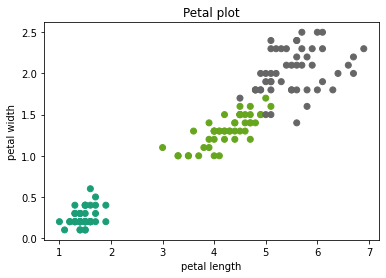

In [ ]:
plt.scatter(iris.data[:,2:3],iris.data[:,3:4],c=iris.target, cmap=plt.cm.Dark2)
plt.title('Petal plot')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [ ]:
class Dtree:
    def __init__(self):
      pass

    def fit(self, df):
        self.df = df
        self.result = pd.DataFrame([])
        # self.build_tree()

    def entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        entropy = sum(probabilities * -np.log2(probabilities))
        return entropy

    # подсчёт прироста информации. Используется более устойчивая формула,
    # которая учитывает не только энтропию подмножеств, но и их размер.
    def calcInfGrow(self, df, left, right):
      if left.shape[0] == 0: # если количиство строк ноль в датафрейме
        return 0
      if right.shape[0] == 0:
        return 0

      # тут энтропия для общего, левого и правого
      Hr = self.entropy(df['y'])
      HrLeft = self.entropy(left['y'])
      HrRight = self.entropy(right['y'])

      # количество элементов в множествах
      QR = df.shape[0]
      Qrl = left.shape[0]
      Qrr = right.shape[0]

      # подсчёт информационного прироста по формуле IG
      return Hr - ((Qrl / QR) * HrLeft + (Qrr / QR) * HrRight)


    # def testSplit(a, t, df):
    #   # a - атрибут, t - пароговое значение
    #   left, right = pd.DataFrame(), pd.DataFrame()
    #   for i, row in df.iterrows():
		#     if row[a] < t:
		# 	    left.append([row[a]])
		#     else:
		# 	    right.append([row[a]])
	  #   return left, right


    # ищет место для наилучшего деления множеста,
    # возвращает пароговое значение и индекс атрибута в датафрейме
    def getSplit(self, df):
      grid = np.linspace(df[0].min(), df[0].max(), 10)
      best_t = grid[0]
      best_IG = -1

      for iColumn in range(0, df.shape[1] - 1):

        # iColumn - атрибут, t - пароговое значение
        grid = np.linspace(df[iColumn].min(), df[iColumn].max(), 10)
        for t in grid:
          # распределение данных по веткам
          # left, right = self.testSplit(iColumn, t, df)
          left = df[df[iColumn] < t]
          right = df[df[iColumn] >= t]

          IG = self.calcInfGrow(df, left, right) # подсчёт прироста информации

          # ищем максимальный прирост
          if IG > best_IG:
            best_t, best_IG  = t, IG
            best_column = iColumn
      return best_t, best_column

    def buildTree(self, df_train, df_test, stop_type, depth, max_leaf):
      t, column = self.getSplit(self.df)
      # left = Dtree(self.df, depth=self.depth + 1, node_type='left_node', rule=None)
      max_leaf += 2
      if self.stop_criterion(stop_type, df_train, depth, max_leaf):
        if df_test.shape[0] > 0:
          df_test['y'] = df_train['y'].value_counts().idxmax()
          self.result = self.result.append(df_test)
          return self
      else:
        t, column = self.getSplit(df_train)
        self.buildTree(df_train[df_train[column] < t], df_test[df_test[column] < t], stop_type, depth + 1, max_leaf)
        self.buildTree(df_train[df_train[column] >= t], df_test[df_test[column] >= t], stop_type, depth + 1, max_leaf)

    # критерия остановки:
    def stop_criterion(self, stop_type, df, depth, max_leaf):
      if (stop_type == 'max_depth' and depth == 5) or (stop_type == 'max_leaf' and max_leaf == 5):
          return True
      if stop_type == 'purity':
        df1, df2, df3 = df[df['y'] == 0], df[df['y'] == 1], df[df['y'] == 2]
        if df1.shape[0] == df.shape[0] or df2.shape[0] == df.shape[0] or df3.shape[0] == df.shape[0]:
          return True
      return False

    def accuracy_metric(self, y_test, y_pred):
      correct = 0
      for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
          correct += 1
      return correct / float(len(y_test)) * 100.0

    # F-мера
    def getAccuracyScore(self, y_test, y_pred):
      tp, tn, fp, fn = 0, 0, 0, 0
      for i in range(len(y_pred)):
        if y_pred[i] == y_test[i] == 1:
          tp = tp + 1
        if y_pred[i] == 0 and y_pred[i] != y_test[i]:
          fn = fn + 1
        if y_pred[i] == 1 and y_pred[i] != y_test[i]:
          fp = fp + 1
        if y_pred[i] == y_test[i] == 0:
          tn = tn + 1
      return (tp + tn) / (tp + fp + tn + fn)

    # def decision_tree(train, test, max_depth, min_size):
	  #   tree = build_tree(train, max_depth, min_size)
	  #   predictions = list()
	  #   for row in test:
		#     prediction = predict(tree, row)
		#     predictions.append(prediction)
	  #   return(predictions)

    def predict(self, df_test, stop_type):
      self.buildTree(self.df, df_test, stop_type, 0, -1)
      self.result.sort_index(inplace=True)
      return self.result



In [ ]:
tr1 = Dtree()
tr2 = Dtree()
tr3 = Dtree()

tr1.fit(df_train)
tr2.fit(df_train)
tr3.fit(df_train)

df1 = tr1.predict(df_test, 'max_leaf')
df2 = tr2.predict(df_test, 'purity')
df3 = tr3.predict(df_test, 'max_depth')

pred1 = df1['y'].values
pred2 = df2['y'].values
pred3 = df3['y'].values

print("my res = {}, sklearn = {}".format(tr1.accuracy_metric(y_test, pred1), accuracy_score(y_test, pred1)))
print("my res = {}, sklearn = {}".format(tr2.accuracy_metric(y_test, pred2), accuracy_score(y_test, pred2)))
print("my res = {}, sklearn = {}".format(tr3.accuracy_metric(y_test, pred3), accuracy_score(y_test, pred3)))

my res = 98.0, sklearn = 0.98
my res = 94.0, sklearn = 0.94
my res = 96.0, sklearn = 0.96


**Вывод:**
  Из результатов вывода видно, что точность sklearn accuracy_score выше, чем результат моей реализации.
  Наиулучшую точность показало первое дерево, на которое было наложено ограничение 'max_leaf' равное 0.972 по sklearn accuracy_score: 0,98.

##  Случайный лес

Опишем алгоритм случайный лес (*random forest*) и попутно разберём основные идеи:

1. Зададим $N$ - число деревьев в лесу.
2. Для каждого $n$ из $N$ сгенерируем свою выборку $X_n$. Пусть $m$ - это количество объектов в $X$. При генерации каждой $X_n$ мы будем брать объекты $m$ раз с возвращением. То есть один и тот же объект может попасть в выборку несколько раз, а какие-то объекты не попадут. (Этот способ назвается бутстрап).
3. По каждой $X_n$ построим решающее дерево $b_n$. Обычно стараются делать глубокие деревья. В качестве критериев остановки можно использовать `max_depth` или `min_samples_leaf` (например, пока в каждом листе не окажется по одному объекту). При каждом разбиении сначала выбирается $k$ (эвристика $k = \sqrt d$, где $d$ - это число признаков объектов из выборки $X$) случайных признаков из исходных, и оптимальное разделение выборки ищется только среди них. Обратите внимание, что мы не выбрасываем оставшиеся признаки!
4. Итоговый алгоритм будет представлять собой результат голосования (для классификации) и среднее арифметическое (для регрессии). Модификация алгоритма предполагает учёт весов каждого отдельного слабого алгоритма в ансамбле, но в этом особо нет смысла.


### Задание 4.2

В качестве набора данных используйте: https://www.kaggle.com/mathchi/churn-for-bank-customers

Там есть описание и примеры работы с этими данными. Если кратко, речь идёт про задачу прогнозирования оттока клиентов. Есть данные о 10 тысячах клиентов банка, часть из которых больше не являются клиентами.

Используя либо свою реализацию, либо  `DecisionTreeClassifier` с разными настройками из `sklearn.tree` реализйте алгоритм "случайный лес".

Найдите наилучшие гиперпараметры этого алгоритма: количество деревьев, критерий остановки, функционал качества, минимальное количество объектов в листьях и другие.

Нельзя использовать готовую реализацию случайного леса из `sklearn`.

В подобных задачах очень важна интерпретируемость алгоритма. Попытайтесь оценить информативность признаков, т.е. ответить а вопрос, значения каких признаков являются самыми важными индикаторами того, что банк потеряет клиента.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

Mounted at /content/drive


In [ ]:
training_data = pd.read_csv('/content/drive/MyDrive/Data/churn.csv')
training_points = training_data.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
training_values = training_data.Exited
training_points.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
training_values.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
encoder = LabelEncoder()
training_points['Geography'] = encoder.fit_transform(training_data['Geography'])
training_points['Gender'] = encoder.fit_transform(training_data['Gender'])

X_train, X_test, y_train, y_test = train_test_split(training_points, training_values, test_size=0.33, random_state=103)

In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6882,586,0,1,32,1,0.00,2,0,0,31635.99
5589,715,1,0,37,9,105489.31,1,0,0,143096.49
6720,609,0,1,26,7,0.00,2,1,0,98463.99
1986,845,1,0,41,2,81733.74,2,0,0,199761.29
980,594,0,1,27,0,197041.80,1,0,0,151912.49


In [ ]:
class RandomForest:

  def __init__(self, quantity=5, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    self.quantity = quantity
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.min_samples_leaf = min_samples_leaf
    self.tree_list = list()
    self.pr = None

  def fit(self, X, y):
    # self.X = X
    # self.y = y

    for i in range(self.quantity):
        tree = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_split=self.min_samples_split, min_samples_leaf=self.min_samples_leaf)
        tree.fit(X, y)
        self.tree_list.append(tree)

  def predict(self, X):
    predictions = list()
    sum = 0
    for i in range(len(self.tree_list)):
        predictions.append(self.tree_list[i].predict(X))
        print(self.tree_list[i].feature_importances_)
    for i in predictions:
        sum += i

    self.pr = sum / len(predictions)
    return self.pr


  def feature_importances(self):
    f = pd.DataFrame(data=None, index=self.tree_list[0].columns, columns=['target'])
    for t in self.trees:
        f[t] = self.trees[t].feature_importances_

    for i in f.index:
        ans = f.loc[i].tolist()[1:]
        f['target'][i] = np.mean(ans)
    return pd.to_numeric(f['target'])


In [ ]:
forest = RandomForest()
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
pred

[0.14806821 0.03417818 0.02528419 0.21995234 0.07334773 0.1539571
 0.11106897 0.01826048 0.0516369  0.16424589]
[0.15431933 0.0346109  0.02386637 0.21876296 0.07078255 0.14284839
 0.11106897 0.01987971 0.05103109 0.17282973]
[0.14680557 0.03357454 0.02072548 0.22478982 0.07154881 0.15035433
 0.11106897 0.02152009 0.05103109 0.16858132]
[0.14907415 0.03236076 0.02541811 0.22142689 0.0744163  0.14955427
 0.11106897 0.01614789 0.0516369  0.16889577]
[0.15174263 0.03152777 0.02427092 0.2137031  0.07636513 0.14804741
 0.11106897 0.01826635 0.05103109 0.17397664]


array([0., 0., 1., ..., 0., 0., 0.])